<a href="https://colab.research.google.com/github/Quanghuy99/Paper_PCA/blob/main/Copy_of_HACKANONS_COLAB_25GB_RAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# preprocessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IoT-23/data_input/export_dataframe.csv',error_bad_lines=False,low_memory=False)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
 df

,#fields,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents label detailed-label,label
0,#types,time,string,addr,port,addr,port,enum,string,interval,count,count,string,bool,bool,count,string,count,count,count,count,set[string] string string,0
1,1562159819.172195,CUg3u41D8SwgQw1Job,0.0.0.0,68,255.255.255.255,67,udp,dhcp,30.004642,8768,0,S0,-,-,0,D,16,9216,0,0,- benign -,NaN,0
2,1562159849.173340,CUpk9Y381SJuOHyK2d,255.255.255.255,68,192.168.1.1,67,udp,dhcp,0.004564,0,3900,SHR,-,-,0,^d,0,0,13,4264,- benign -,NaN,0
3,1562159953.959669,CC5CQA3Ptzma7a0by4,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,dns,3.948539,876,0,S0,-,-,0,D,6,1164,0,0,- benign -,NaN,0
4,1562159998.302954,C3sgcmfvNzjNoY0Kd,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,dns,3.768179,876,0,S0,-,-,0,D,6,1164,0,0,- benign -,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17868520,1537542560.979740,Ce0LkH33VlZBF8Vw93,fe80::106c:9e5b:3af8:9cf,143,ff02::16,0,icmp,-,1.945701,40,0,OTH,-,-,0,-,2,152,0,0,- benign -,NaN,0
17868521,1537542535.379473,CdWSpn4EA2vXfUBqI7,fe80::183b:7564:dbcc:3eca,143,ff02::16,0,icmp,-,1.024087,40,0,OTH,-,-,0,-,2,152,0,0,- benign -,NaN,0
17868522,1537542504.559192,ClKCqX3JOxjrti9lLh,fe80::1847:a1bd:8d13:f43c,143,ff02::16,0,icmp,-,59.390351,80,0,OTH,-,-,0,-,4,304,0,0,- benign -,NaN,0
17868523,1537542573.267978,CDsdf81FPzUzFBBRBe,fe80::1c5c:213d:7cf8:890,143,ff02::16,0,icmp,-,-,-,-,OTH,-,-,0,-,1,76,0,0,- benign -,NaN,0


In [ ]:
array = ['#types', '#close']
noise = df.loc[df['#fields'].isin(array)]
noise.index

Int64Index([       0,      131,      132,  6378426,  6378427,  6378880,
             6378881, 17833596, 17833597, 17856743, 17856744, 17867148,
            17867149, 17868524],
           dtype='int64')

In [ ]:
df = df.drop(noise.index)

In [ ]:
DF = df.replace({'-':np.nan})

In [ ]:
DF =  DF.fillna(DF.mode().iloc[0])

In [ ]:
DF['conn_state'] = DF['conn_state'].replace(np.nan, 0)
DF['local_orig'] = DF['local_orig'].replace(np.nan, 0)
DF['tunnel_parents   label   detailed-label'] = DF['tunnel_parents   label   detailed-label'].replace(np.nan, 0)

In [ ]:
DF

,#fields,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents label detailed-label,label
1,1562159819.172195,CUg3u41D8SwgQw1Job,0.0.0.0,68,255.255.255.255,67,udp,dhcp,30.004642,8768,0,S0,0.0,0.0,0,D,16,9216,0,0,- benign -,0.0,0
2,1562159849.173340,CUpk9Y381SJuOHyK2d,255.255.255.255,68,192.168.1.1,67,udp,dhcp,0.004564,0,3900,SHR,0.0,0.0,0,^d,0,0,13,4264,- benign -,0.0,0
3,1562159953.959669,CC5CQA3Ptzma7a0by4,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,dns,3.948539,876,0,S0,0.0,0.0,0,D,6,1164,0,0,- benign -,0.0,0
4,1562159998.302954,C3sgcmfvNzjNoY0Kd,fe80::5bcc:698e:39d5:cdf,5353,ff02::fb,5353,udp,dns,3.768179,876,0,S0,0.0,0.0,0,D,6,1164,0,0,- benign -,0.0,0
5,1562160024.472592,CJVaCgoBTEsu0jjDi,fe80::4eef:c0ff:fe27:561e,5353,ff02::fb,5353,udp,dns,0.000114,451,0,S0,0.0,0.0,0,D,11,979,0,0,- benign -,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17868519,1537542534.223382,CrPQ4n1jVFxbm0mcj9,192.168.69.136,51443,239.255.255.250,1900,udp,dns,0.001746,0,0,S0,0.0,0.0,0,D,1,153,0,0,- benign -,0.0,0
17868520,1537542560.979740,Ce0LkH33VlZBF8Vw93,fe80::106c:9e5b:3af8:9cf,143,ff02::16,0,icmp,dns,1.945701,40,0,OTH,0.0,0.0,0,S,2,152,0,0,- benign -,0.0,0
17868521,1537542535.379473,CdWSpn4EA2vXfUBqI7,fe80::183b:7564:dbcc:3eca,143,ff02::16,0,icmp,dns,1.024087,40,0,OTH,0.0,0.0,0,S,2,152,0,0,- benign -,0.0,0
17868522,1537542504.559192,ClKCqX3JOxjrti9lLh,fe80::1847:a1bd:8d13:f43c,143,ff02::16,0,icmp,dns,59.390351,80,0,OTH,0.0,0.0,0,S,4,304,0,0,- benign -,0.0,0


In [ ]:
X = DF.iloc[::,:DF.shape[1]-1]

#Y = DF.iloc[::,-1].values
Y = DF.iloc[::,-1]

In [ ]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
encoder = OrdinalEncoder()
imputer = IterativeImputer(ExtraTreesRegressor())
le = LabelEncoder()
# create a list of categorical columns to iterate over
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in X.columns:
  print(columns)
  encode(X[columns])

#fields


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


ts


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


uid


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


id.orig_h


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


id.orig_p


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


id.resp_h


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


id.resp_p


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


proto


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


service


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


duration


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


orig_bytes


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


resp_bytes


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


conn_state


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


local_orig


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


local_resp


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


missed_bytes


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


history


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


orig_pkts


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


orig_ip_bytes


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


resp_pkts


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


resp_ip_bytes


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


tunnel_parents   label   detailed-label


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
Xtrain_std = sc.fit_transform(X)

In [ ]:
from sklearn import decomposition
# Create a pca object with the k components as a parameter
pca = decomposition.PCA(n_components=8)

# Fit the PCA and transform the data
Xa = pca.fit_transform(Xtrain_std)

In [ ]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
# counter = Counter(Y)
# print(counter)
# transform the dataset
oversample = ADASYN()
x, y = oversample.fit_resample(Xa, Y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 17866574, 1: 17866555})


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
#X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.2)

In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras.constraints import maxnorm
from keras.optimizers import SGD

In [ ]:
model = Sequential([
    Dense(120, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(8,)),
    Dropout(0.3),
    Dense(65, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(35, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid'),
])

In [ ]:
epochs = 1
learning_rate = 0.01
momentum = 0.9
sgd = SGD(learning_rate=learning_rate, momentum=momentum)
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
import time
from datetime import timedelta
start_time = time.monotonic()




hist = model.fit(X_train, Y_train,
          batch_size=512, epochs=epochs,)
          # validation_data=(X_val, Y_val))




end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

 2510/55834 [>.............................] - ETA: 4:06 - loss: 0.2218 - accuracy: 0.9927

KeyboardInterrupt: ignored

In [ ]:
len(X_train[0])

8

## features = 22

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IoT-23/data_input/X_23.csv',error_bad_lines=False,low_memory=False).values
Y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IoT-23/data_input/Y_23.csv',error_bad_lines=False,low_memory=False).values

In [ ]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
# counter = Counter(Y)
# print(counter)
# transform the dataset
oversample = ADASYN()
x, y = oversample.fit_resample(X, Y)
# summarize the new class distribution
counter = Counter(y)
print(counter)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

Counter({1: 17866555, 0: 17866341})


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
Xa = sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(Xa, y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.2)

In [ ]:
print("X_train",len(X_train))
print("Y_train",len(Y_train))
print("X_test",len(X_test))
print("Y_test",len(Y_test))
print("X_val",len(X_val))
print("Y_val",len(Y_val))

X_train 28586316
Y_train 28586316
X_test 1429316
Y_test 1429316
X_val 5717264
Y_val 5717264


In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras.constraints import maxnorm
from keras.optimizers import SGD

In [ ]:
model = Sequential([
    Dense(120, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(22,)),
    Dropout(0.3),
    Dense(65, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(35, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 120)               2760      
_________________________________________________________________
module_wrapper_8 (ModuleWrap (None, 120)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 65)                7865      
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 65)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 35)                2310      
_________________________________________________________________
module_wrapper_10 (ModuleWra (None, 35)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)               

In [ ]:

epochs = 4
learning_rate = 0.01
momentum = 0.9
sgd = SGD(learning_rate=learning_rate, momentum=momentum)
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
import time
from datetime import timedelta
start_time = time.monotonic()




hist = model.fit(X_train, Y_train,
          batch_size=512, epochs=epochs,
          validation_data=(X_val, Y_val))




end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

Epoch 1/4
55833/55833 [==============================] - 382s 7ms/step - loss: 0.0555 - accuracy: 0.9979 - val_loss: 0.0327 - val_accuracy: 0.9993
Epoch 2/4
55833/55833 [==============================] - 384s 7ms/step - loss: 0.0365 - accuracy: 0.9987 - val_loss: 0.0300 - val_accuracy: 0.9993
Epoch 3/4
55833/55833 [==============================] - 388s 7ms/step - loss: 0.0336 - accuracy: 0.9988 - val_loss: 0.0278 - val_accuracy: 0.9994
Epoch 4/4
55833/55833 [==============================] - 391s 7ms/step - loss: 0.0318 - accuracy: 0.9989 - val_loss: 0.0262 - val_accuracy: 0.9998
0:25:49.625131


In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/IoT-23/model_22features")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/IoT-23/model_22features/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/IoT-23/model_22features/assets


In [ ]:
import time
from datetime import timedelta
start_time = time.monotonic()

yout = model.predict_classes(X_test)

end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0:00:40.263582


In [ ]:
result = yout.ravel()

In [ ]:
def my_confusion_matrix(y_true, y_pred):
    N = np.unique(y_true).shape[0] # number of classes 
    cm = np.zeros((N, N))
    for n in range(y_true.shape[0]):
        cm[y_true[n], y_pred[n]] += 1
    return cm 

cnf_matrix = my_confusion_matrix(Y_test, result)
print('Confusion matrix:')
print(cnf_matrix)
print('\nAccuracy:', np.diagonal(cnf_matrix).sum()/cnf_matrix.sum())


Confusion matrix:
[[7.14238e+05 0.00000e+00]
 [2.86000e+02 7.14792e+05]]

Accuracy: 0.9997999042898841


##TH features = 16


In [ ]:
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IoT-23/data_input/X_23.csv',error_bad_lines=False,low_memory=False)
Y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IoT-23/data_input/Y_23.csv',error_bad_lines=False,low_memory=False).values

KeyboardInterrupt: ignored

In [ ]:
cut = ['local_orig','conn_state','tunnel_parents   label   detailed-label',
       'proto','orig_bytes','duration','service']
X = X.drop(cut, axis=1)

In [ ]:
X

,#fields,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,resp_bytes,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,17868380.0,8842789.0,1.0,61981.0,10823557.0,4008.0,2.0,6.0,0.0,5.0,19.0,852.0,0.0,0.0,10.0
1,17868381.0,8887696.0,5309.0,61981.0,8003385.0,4008.0,2.0,12.0,0.0,112.0,0.0,0.0,12.0,271.0,10.0
2,17868387.0,3485594.0,8749.0,48369.0,16581289.0,3112.0,2.0,6.0,0.0,5.0,90.0,59.0,0.0,0.0,10.0
3,17868388.0,1119675.0,8749.0,48369.0,16581289.0,3112.0,2.0,6.0,0.0,5.0,90.0,59.0,0.0,0.0,10.0
4,17868389.0,5625874.0,8748.0,48369.0,16581289.0,3112.0,2.0,6.0,0.0,5.0,4.0,873.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17868506,17844765.0,15392839.0,3196.0,46051.0,10657502.0,685.0,2.0,6.0,0.0,5.0,1.0,196.0,0.0,0.0,10.0
17868507,17844778.0,11530428.0,8740.0,4780.0,16581282.0,0.0,0.0,0.0,0.0,23.0,31.0,195.0,0.0,0.0,10.0
17868508,17844767.0,11391762.0,8742.0,4780.0,16581282.0,0.0,0.0,0.0,0.0,23.0,31.0,195.0,0.0,0.0,10.0
17868509,17844754.0,13639170.0,8743.0,4780.0,16581282.0,0.0,0.0,0.0,0.0,23.0,65.0,402.0,0.0,0.0,10.0


In [ ]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
# counter = Counter(Y)
# print(counter)
# transform the dataset
oversample = ADASYN()
x, y = oversample.fit_resample(X, Y)
# summarize the new class distribution
counter = Counter(y)
print(counter)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

Counter({1: 17866555, 0: 17866508})


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
Xa = sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(Xa, y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.2)

In [ ]:
print("X_train",len(X_train))
print("Y_train",len(Y_train))
print("X_test",len(X_test))
print("Y_test",len(Y_test))
print("X_val",len(X_val))
print("Y_val",len(Y_val))

X_train 28586450
Y_train 28586450
X_test 1429323
Y_test 1429323
X_val 5717290
Y_val 5717290


In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras.constraints import maxnorm
from keras.optimizers import SGD

In [ ]:
model1 = Sequential([
    Dense(120, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(15,)),
    Dropout(0.3),
    Dense(65, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(35, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 120)               1920      
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 120)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 65)                7865      
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 65)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 35)                2310      
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 35)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)               

In [ ]:
epochs = 4
learning_rate = 0.01
momentum = 0.9
sgd = SGD(learning_rate=learning_rate, momentum=momentum)
model1.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
import time
from datetime import timedelta
start_time = time.monotonic()




hist = model1.fit(X_train, Y_train,
          batch_size=512, epochs=epochs,
          validation_data=(X_val, Y_val))




end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

Epoch 1/4
55833/55833 [==============================] - 316s 6ms/step - loss: 0.0561 - accuracy: 0.9983 - val_loss: 0.0337 - val_accuracy: 0.9994
Epoch 2/4
55833/55833 [==============================] - 313s 6ms/step - loss: 0.0366 - accuracy: 0.9991 - val_loss: 0.0302 - val_accuracy: 0.9994
Epoch 3/4
55833/55833 [==============================] - 316s 6ms/step - loss: 0.0336 - accuracy: 0.9992 - val_loss: 0.0279 - val_accuracy: 0.9995
Epoch 4/4
55833/55833 [==============================] - 315s 6ms/step - loss: 0.0317 - accuracy: 0.9993 - val_loss: 0.0267 - val_accuracy: 0.9996
0:21:02.058668


In [ ]:
import time
from datetime import timedelta
start_time = time.monotonic()

yout = model1.predict_classes(X_test)

end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0:00:41.139643


In [ ]:
result = yout.ravel()

In [ ]:
def my_confusion_matrix(y_true, y_pred):
    N = np.unique(y_true).shape[0] # number of classes 
    cm = np.zeros((N, N))
    for n in range(y_true.shape[0]):
        cm[y_true[n], y_pred[n]] += 1
    return cm 

cnf_matrix = my_confusion_matrix(Y_test, result)
print('Confusion matrix:')
print(cnf_matrix)
print('\nAccuracy:', np.diagonal(cnf_matrix).sum()/cnf_matrix.sum())

Confusion matrix:
[[7.14528e+05 0.00000e+00]
 [6.03000e+02 7.14192e+05]]

Accuracy: 0.999578121950042


## features = 8

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IoT-23/data_input/X_23.csv',error_bad_lines=False,low_memory=False).values
Y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IoT-23/data_input/Y_23.csv',error_bad_lines=False,low_memory=False).values

In [ ]:
# cut = ['local_orig','conn_state','tunnel_parents   label   detailed-label',
#        'proto','orig_bytes','duration','service']
# X = X.drop(cut, axis=1)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
Xtrain_std = sc.fit_transform(X)

In [ ]:
from sklearn import decomposition
# Create a pca object with the k components as a parameter
pca = decomposition.PCA(n_components=2)

# Fit the PCA and transform the data
Xa = pca.fit_transform(Xtrain_std)

In [ ]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
# counter = Counter(Y)
# print(counter)
# transform the dataset
oversample = ADASYN()
x, y = oversample.fit_resample(Xa, Y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({1: 17866555, 0: 17866532})


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(x, y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.2)

In [ ]:
print("X_train",len(X_train))
print("Y_train",len(Y_train))
print("X_test",len(X_test))
print("Y_test",len(Y_test))
print("X_val",len(X_val))
print("Y_val",len(Y_val))

X_train 28586469
Y_train 28586469
X_test 1429324
Y_test 1429324
X_val 5717294
Y_val 5717294


In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras.constraints import maxnorm
from keras.optimizers import SGD

In [ ]:
model3 = Sequential([
    Dense(120, activation='relu', input_shape=(2,)),
    Dropout(0.3),
    Dense(65, activation='relu'),
    Dropout(0.3),
    Dense(35, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 120)               360       
_________________________________________________________________
module_wrapper_8 (ModuleWrap (None, 120)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 65)                7865      
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 65)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 35)                2310      
_________________________________________________________________
module_wrapper_10 (ModuleWra (None, 35)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)               

In [ ]:
epochs = 1
learning_rate = 0.01
momentum = 0.9
sgd = SGD(learning_rate=learning_rate, momentum=momentum)
model3.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
import time
from datetime import timedelta
start_time = time.monotonic()




hist = model3.fit(X_train, Y_train,
          batch_size=512, epochs=epochs,
          validation_data=(X_val, Y_val))




end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

55833/55833 [==============================] - 255s 5ms/step - loss: 0.0220 - accuracy: 0.9957 - val_loss: 0.0183 - val_accuracy: 0.9961
0:04:15.610815


In [ ]:
import time
from datetime import timedelta
start_time = time.monotonic()

yout = model3.predict_classes(X_test)

end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0:00:27.928609


In [ ]:
result = yout.ravel()

In [ ]:
def my_confusion_matrix(y_true, y_pred):
    N = np.unique(y_true).shape[0] # number of classes 
    cm = np.zeros((N, N))
    for n in range(y_true.shape[0]):
        cm[y_true[n], y_pred[n]] += 1
    return cm 

cnf_matrix = my_confusion_matrix(Y_test, result)
print('Confusion matrix:')
print(cnf_matrix)
print('\nAccuracy:', np.diagonal(cnf_matrix).sum()/cnf_matrix.sum())

Confusion matrix:
[[714410.      0.]
 [  5540. 709374.]]

Accuracy: 0.9961240418547509


In [ ]:
import pandas as pd
d = {'22 features':[1529775,41139],
        '15 features':[1261235,30673],
        '8 features' : [609007,17201]}
df = pd.DataFrame(data=d)

In [ ]:
training_time = df.iloc[0]
testing_time = df.iloc[1]

In [ ]:
training_time

22 features    1529775
15 features    1261235
8 features      609007
Name: 0, dtype: int64

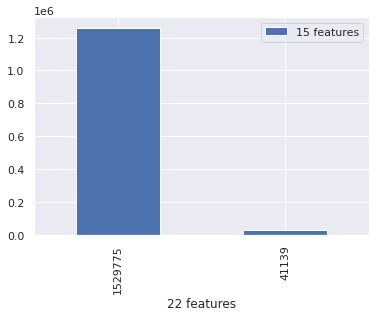

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# a simple line plot
df.plot(kind='bar',x='22 features',y='15 features')

In [ ]:
!python --version


Python 3.7.11
